In [2]:
import pandas as pd
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [3]:
# converting the tradetimestamps to datetime and then extract just the date
trades['Trade Date'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True, errors='coerce').dt.date

In [4]:
# Convert the 'date' column to date format (to match trade dates)
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [5]:
# Merge trades with sentiment on the date
merged = pd.merge(trades, sentiment[['date', 'classification']], left_on='Trade Date', right_on='date', how='left')

# Optional: remove duplicate 'date' column after merge
merged.drop(columns=['date'], inplace=True)

In [6]:
merged.groupby('classification')['Closed PnL'].mean()

classification
Extreme Fear      26.578119
Extreme Greed    120.893258
Fear              86.681258
Greed             78.677868
Neutral           41.957142
Name: Closed PnL, dtype: float64

In [7]:
merged.groupby('classification')['Closed PnL'].agg(['mean', 'median', 'count', 'std'])

,mean,median,count,std
classification,,,,
Extreme Fear,26.578119,0.000000,18315,810.927900
Extreme Greed,120.893258,0.526249,11220,1186.132241
Fear,86.681258,0.000000,28391,1277.470509
Greed,78.677868,0.000000,13103,1794.090386
Neutral,41.957142,0.000000,8196,863.641825


In [8]:
# Group by sentiment and side (BUY/SELL), then calculate average Closed PnL
side_sentiment_pnl = merged.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()

# See the average profit/loss for BUY vs SELL under each mood
print(side_sentiment_pnl)

Side                   BUY        SELL
classification                        
Extreme Fear     14.630316   39.773830
Extreme Greed    22.598023  186.447753
Fear            106.195021   67.973894
Greed            89.507811   69.929341
Neutral          60.429787   21.307875


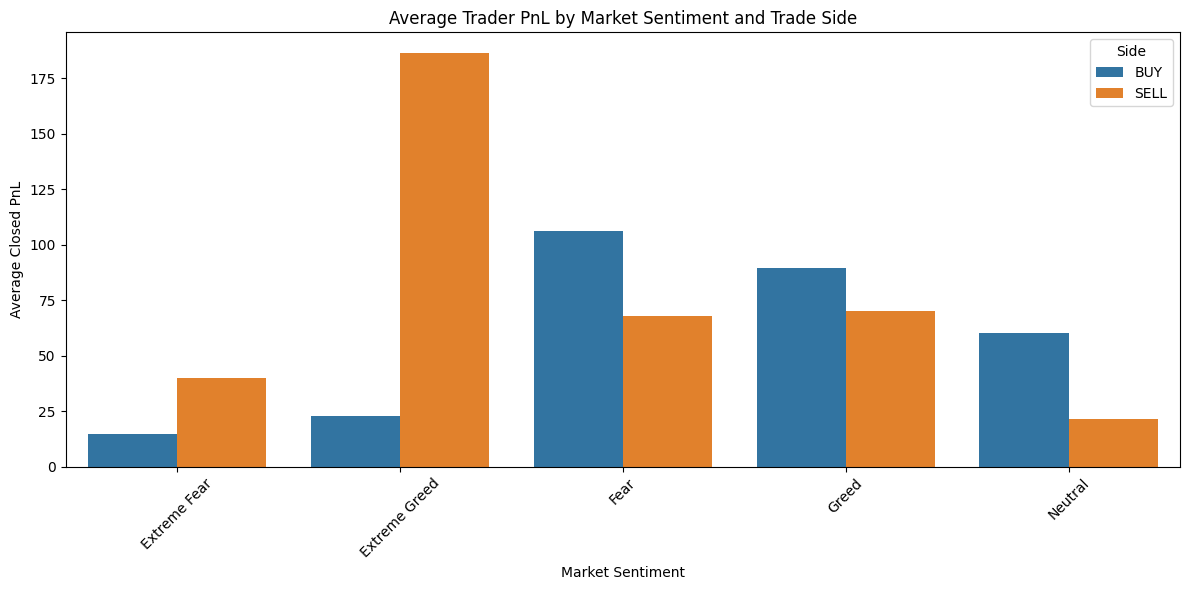

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare bar plot
side_sentiment_pnl_plot = merged.groupby(['classification', 'Side'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='classification', y='Closed PnL', hue='Side', data=side_sentiment_pnl_plot)
plt.title('Average Trader PnL by Market Sentiment and Trade Side')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()